In [132]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
import statsmodels.api as sma
%pylab inline

/usr/local/anaconda/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


Populating the interactive namespace from numpy and matplotlib


# Loading sensor data into python

In [6]:
sid_nodes_list = ['sonycnode-b827ebb40450.sonyc',\
                      'sonycnode-b827eb9bed23.sonyc',\
                      'sonycnode-b827eb905497.sonyc',\
                      'sonycnode-b827eb7b2c3e.sonyc',\
                      'sonycnode-b827eb4cc22e.sonyc',\
                      'sonycnode-b827eb1685c7.sonyc',\
                      'sonycnode-b827ebc6dcc6.sonyc',\
                      'sonycnode-b827eb0fedda.sonyc']

In [7]:
for i in sid_nodes_list:
    print(i+'.p')

sonycnode-b827ebb40450.sonyc.p
sonycnode-b827eb9bed23.sonyc.p
sonycnode-b827eb905497.sonyc.p
sonycnode-b827eb7b2c3e.sonyc.p
sonycnode-b827eb4cc22e.sonyc.p
sonycnode-b827eb1685c7.sonyc.p
sonycnode-b827ebc6dcc6.sonyc.p
sonycnode-b827eb0fedda.sonyc.p


In [383]:
d_seconds = {}
for i in sid_nodes_list: 
    print('%s_df' % i)
    varname = '{}_df'.format(i)
    d_seconds[varname] = pd.read_pickle(i+'.p').dropna().resample('1S').mean()

sonycnode-b827ebb40450.sonyc_df
sonycnode-b827eb9bed23.sonyc_df
sonycnode-b827eb905497.sonyc_df
sonycnode-b827eb7b2c3e.sonyc_df
sonycnode-b827eb4cc22e.sonyc_df
sonycnode-b827eb1685c7.sonyc_df
sonycnode-b827ebc6dcc6.sonyc_df
sonycnode-b827eb0fedda.sonyc_df


In [213]:
d_monthly = {}
for i in sid_nodes_list: 
    print('%s_df' % i)
    varname = '{}_df'.format(i)
    d_monthly[varname] = pd.read_pickle(i+'.p').dropna().resample('1M').mean()

sonycnode-b827ebb40450.sonyc_df
sonycnode-b827eb9bed23.sonyc_df
sonycnode-b827eb905497.sonyc_df
sonycnode-b827eb7b2c3e.sonyc_df
sonycnode-b827eb4cc22e.sonyc_df
sonycnode-b827eb1685c7.sonyc_df
sonycnode-b827ebc6dcc6.sonyc_df
sonycnode-b827eb0fedda.sonyc_df


/usr/local/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/data.py:164: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
/usr/local/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/data.py:181: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "


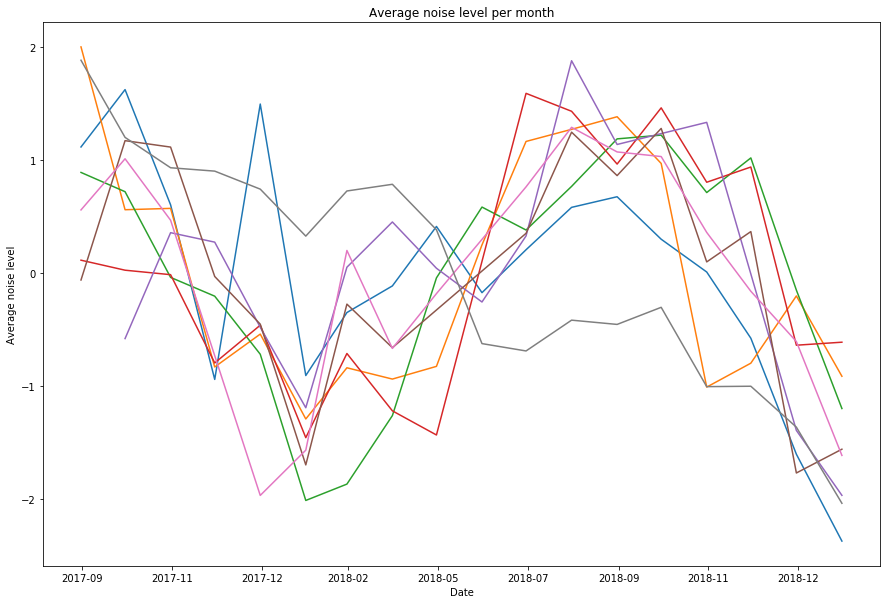

In [167]:
plt.figure(figsize=(15,10))
plt.title("Average noise level per month")
plt.xlabel('Date')
plt.ylabel('Average noise level')
for i in sid_nodes_list: 
    node_id =  i+'_df'
    plt.plot(d_monthly[node_id].dropna().index,\
        preprocessing.scale(d_monthly[node_id].dropna().dBAS))

This figure shows us a normalized look of the sensor data over the dates. We see peaks and valleys but however aggregated at a monthly level it is not very informative of construction noises.

In [71]:
d_hourly = {}
for i in sid_nodes_list: 
    print('%s_df' % i)
    varname = '{}_df'.format(i)
    d_hourly[varname] = pd.read_pickle(i+'.p').dropna().resample('1H').mean()

sonycnode-b827ebb40450.sonyc_df
sonycnode-b827eb9bed23.sonyc_df
sonycnode-b827eb905497.sonyc_df
sonycnode-b827eb7b2c3e.sonyc_df
sonycnode-b827eb4cc22e.sonyc_df
sonycnode-b827eb1685c7.sonyc_df
sonycnode-b827ebc6dcc6.sonyc_df
sonycnode-b827eb0fedda.sonyc_df


/usr/local/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/data.py:164: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
/usr/local/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/data.py:181: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "


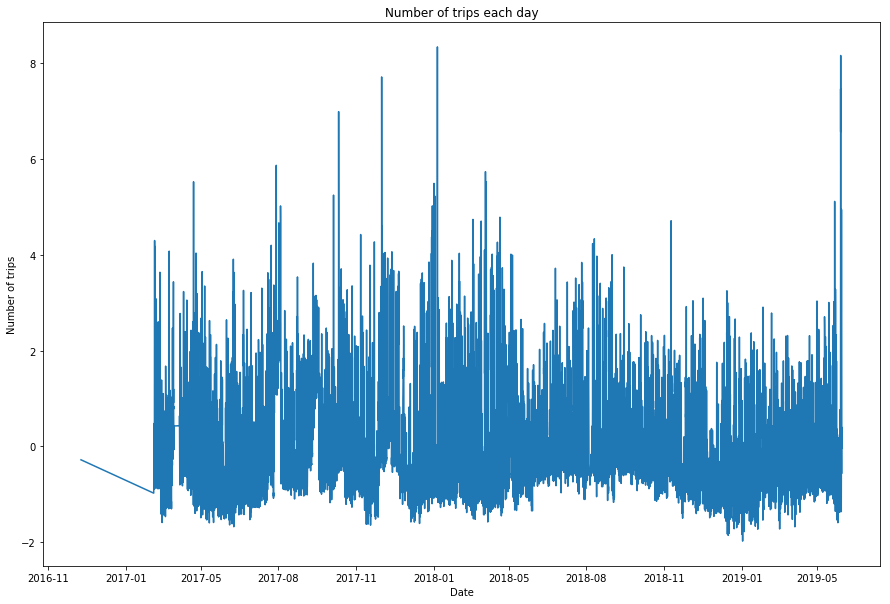

In [26]:
plt.figure(figsize=(15,10))
plt.title("Hourly noise level")
plt.xlabel('Date')
plt.ylabel('Average noise level every hour')
plt.plot(d_hourly['sonycnode-b827ebb40450.sonyc_df'].dropna().index,\
        preprocessing.scale(d_hourly['sonycnode-b827ebb40450.sonyc_df'].dropna().dBAS))
# plt.plot(d_hourly['sonycnode-b827eb9bed23.sonyc_df'].dropna().index,\
#         preprocessing.scale(d_hourly['sonycnode-b827eb9bed23.sonyc_df'].dropna().dBAS))

This graph shows that there is a lot of noise in the data as well as too many dates so we need to find a method to identify just the construction noises.

In [43]:
d_hourly['sonycnode-b827ebb40450.sonyc_df']['hour'] = d_hourly['sonycnode-b827ebb40450.sonyc_df'].reset_index().timestamp.dt.hour

# Rolling mean

This section attempts at using rolling mean to smoothen the data using rolling mean.

In [50]:
d_daily = {}
for i in sid_nodes_list: 
    print('%s_df' % i)
    varname = '{}_df'.format(i)
    d_daily[varname] = pd.read_pickle(i+'.p').dropna().resample('1D').mean()

sonycnode-b827ebb40450.sonyc_df
sonycnode-b827eb9bed23.sonyc_df
sonycnode-b827eb905497.sonyc_df
sonycnode-b827eb7b2c3e.sonyc_df
sonycnode-b827eb4cc22e.sonyc_df
sonycnode-b827eb1685c7.sonyc_df
sonycnode-b827ebc6dcc6.sonyc_df
sonycnode-b827eb0fedda.sonyc_df


In [191]:
for i in sid_nodes_list: 
    varname = '{}_df'.format(i)
    d_daily[varname]['rolling_mean'] = d_daily[varname].dBAS.rolling(window=31,center=True,min_periods=11).mean()

Since there are missing values in the sensor data we have used minimum periods as 11 so as to reduce the number of null values in the data.

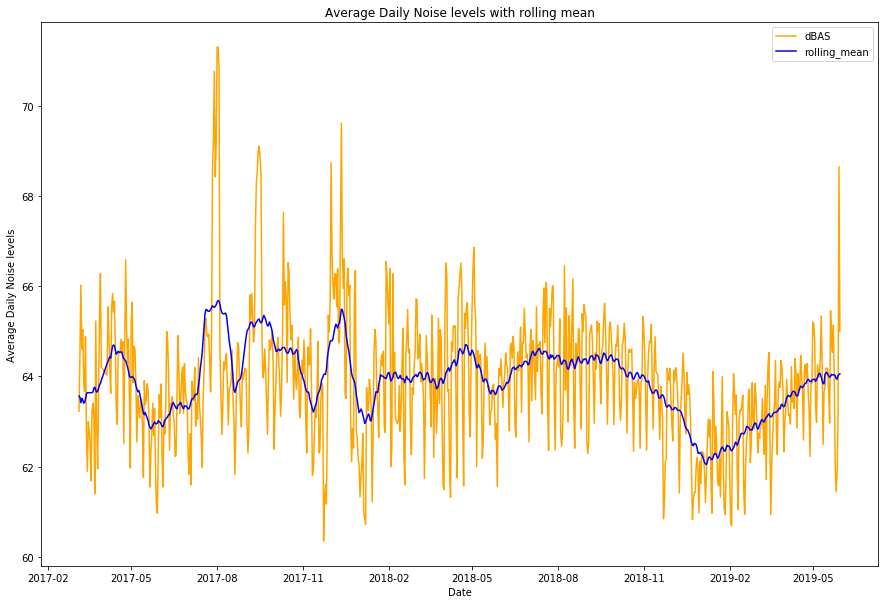

In [203]:
plt.figure(figsize=(15,10))
plt.title("Average Daily Noise levels with rolling mean")
plt.xlabel('Date')
plt.ylabel('Average Daily Noise levels')
plt.plot(d_daily['sonycnode-b827ebb40450.sonyc_df'].dropna().index,\
        d_daily['sonycnode-b827ebb40450.sonyc_df'].dropna().dBAS,color='orange')
plt.plot(d_daily['sonycnode-b827ebb40450.sonyc_df'].dropna().index,\
        d_daily['sonycnode-b827ebb40450.sonyc_df'].dropna().rolling_mean,color='blue')
plt.legend()

In the above figure the blue plot shows the same timeseries with rolling mean applied. It is easier to infer periods of high noise level in this plot.

# Looking for patterns indicating construction

In this section we aim to generalize a method of identifying properties of the noise levels that indicate there is construction taking place(eg.high noise level sustained for a period of 10-15 minutes). 

In [93]:
d_minute = {}
for i in sid_nodes_list: 
    print('%s_df' % i)
    varname = '{}_df'.format(i)
    d_minute[varname] = pd.read_pickle(i+'.p').dropna().resample('60S').mean()

sonycnode-b827ebb40450.sonyc_df
sonycnode-b827eb9bed23.sonyc_df
sonycnode-b827eb905497.sonyc_df
sonycnode-b827eb7b2c3e.sonyc_df
sonycnode-b827eb4cc22e.sonyc_df
sonycnode-b827eb1685c7.sonyc_df
sonycnode-b827ebc6dcc6.sonyc_df
sonycnode-b827eb0fedda.sonyc_df


The drop in the above plot showed us that there were points where the ambient level of the sensor either jumped up or dropped abruptly. This meant that simply assuming a spike in the noise levels could indicate a construction noise was not good enough. 

In [214]:
for i in sid_nodes_list: 
    varname = '{}_df'.format(i)
    d_minute[varname]['rolling_mean'] = d_minute[varname].dBAS.rolling(window=10,center=True).mean()
    d_minute[varname]['rolling_std'] = d_minute[varname].dBAS.rolling(window=10,center=True).std()

In [362]:
d_minute_during_hours = {}
d_minute_out_of_hours = {}
for i in sid_nodes_list: 
    varname = '{}_df'.format(i)
    d_minute[varname]['rolling_mean'] = d_minute[varname].dBAS.rolling(window=15,center=True,min_periods=7).mean()
    d_minute[varname]['rolling_std'] = d_minute[varname].dBAS.rolling(window=15,center=True,min_periods=7).std()
    d_minute[varname]['hour'] =  d_minute[varname].index.hour
    d_minute[varname]['dow'] =  d_minute[varname].index.dayofweek
    d_minute_during_hours[varname] = d_minute[varname][((d_minute[varname].hour.isin([7,8,9,10,11,12,13,14,15,16,17])\
                                                          & (d_minute[varname].dow.isin([0,1,2,3,4]))))]
    d_minute_out_of_hours[varname] = d_minute[varname][~((d_minute[varname].hour.isin([7,8,9,10,11,12,13,14,15,16,17])\
                                                          & (d_minute[varname].dow.isin([0,1,2,3,4]))))]

In [424]:
d_minute['sonycnode-b827ebb40450.sonyc_df']['rolling_mean_left'] = d_minute['sonycnode-b827ebb40450.sonyc_df']\
['dBAS'].rolling(window = 9).mean().shift(-8)

/usr/local/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:8: FutureWarning: 'argmax' is deprecated. Use 'idxmax' instead. The behavior of 'argmax' will be corrected to return the positional maximum in the future. Use 'series.values.argmax' to get the position of the maximum now.
  


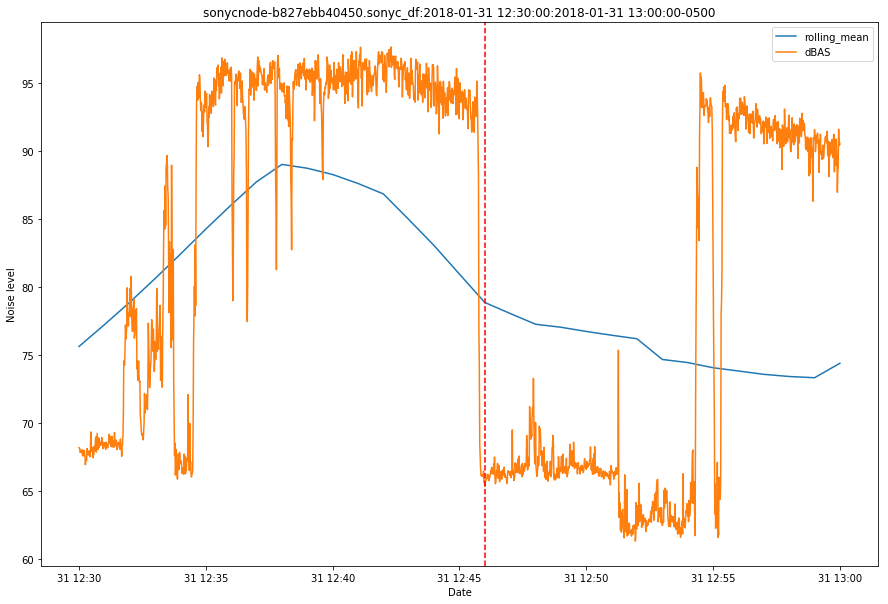

In [426]:
plt.figure(figsize=(15,10))
plt.title("sonycnode-b827ebb40450.sonyc_df:2018-01-31 12:30:00:2018-01-31 13:00:00-0500")
plt.xlabel('Date')
plt.ylabel('Noise level')
plt.plot(d_minute['sonycnode-b827ebb40450.sonyc_df'].loc['2018-01-31 12:30:00-0500':'2018-01-31 13:00:00-0500'].index,\
        d_minute['sonycnode-b827ebb40450.sonyc_df'].loc['2018-01-31 12:30:00-0500':'2018-01-31 13:00:00-0500'].rolling_mean)
plt.plot(d_seconds['sonycnode-b827ebb40450.sonyc_df'].loc['2018-01-31 12:30:00-0500':'2018-01-31 13:00:00-0500'].index,\
        d_seconds['sonycnode-b827ebb40450.sonyc_df'].loc['2018-01-31 12:30:00-0500':'2018-01-31 13:00:00-0500'].dBAS)
plt.legend()
plt.axvline(x=d_minute['sonycnode-b827ebb40450.sonyc_df'].dropna().rolling_std.argmax(),color='r', linestyle='--')

The above plot shows an instance where the standard deviation is really high. The intuition was that this is either construction noise or a sensor fault.

# Sensor Data for a particular time period where jackhammering was observed

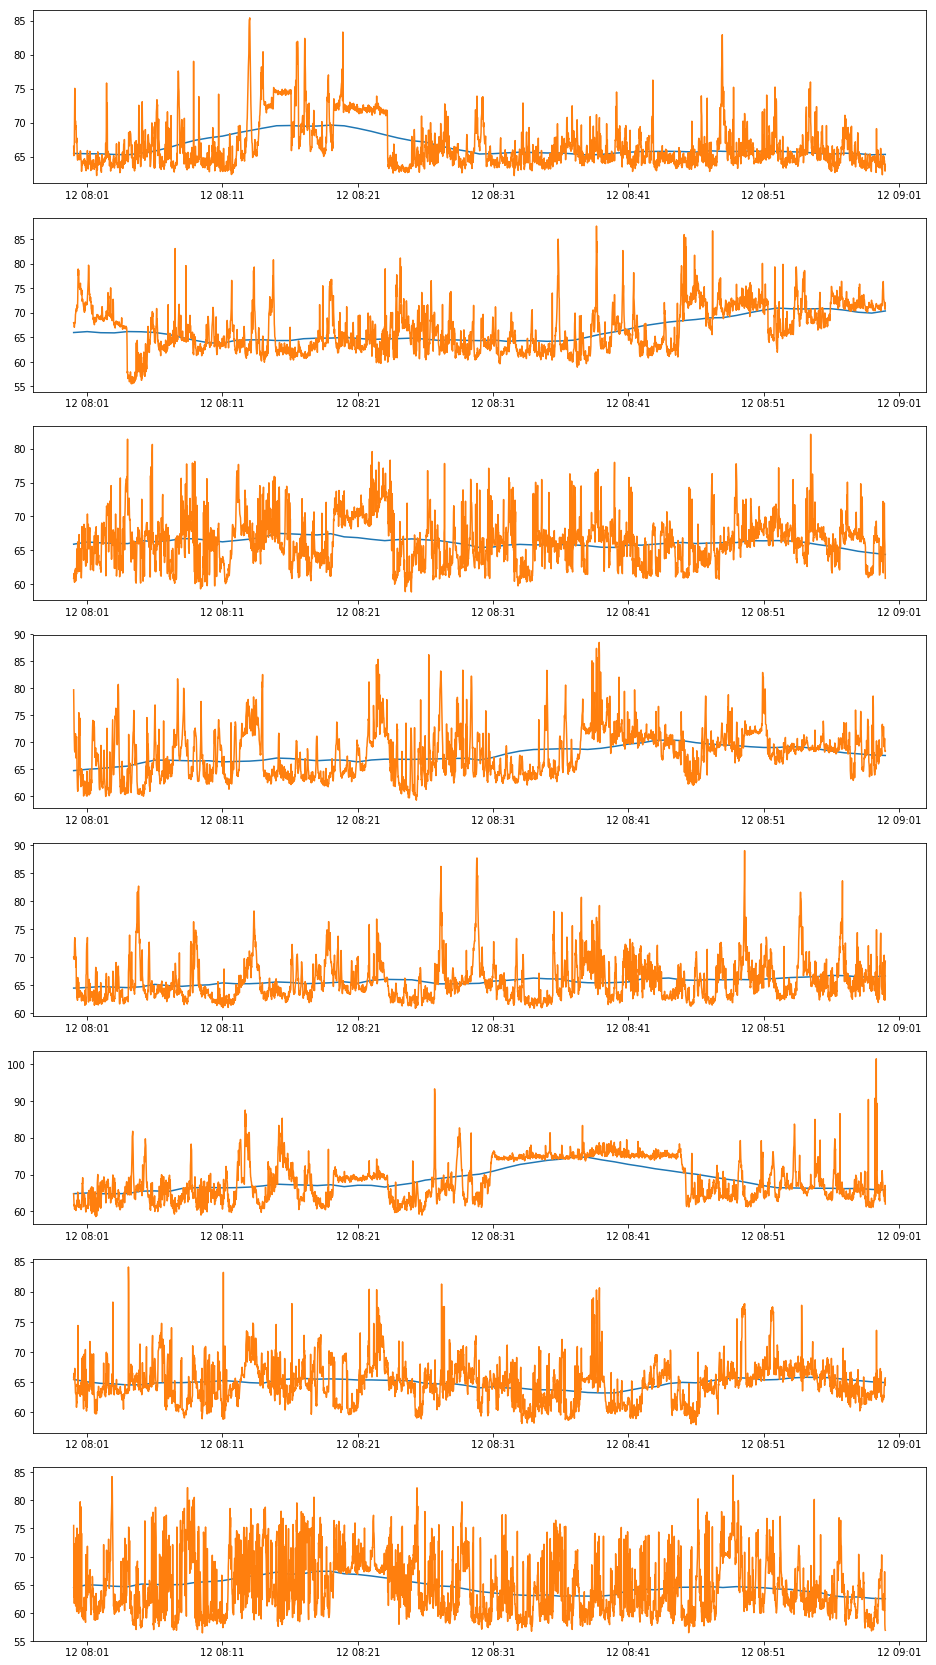

In [385]:
plt.tight_layout()
fig, axs = plt.subplots(len(sid_nodes_list),1, figsize=(16, 30))
j=0
for i in sid_nodes_list: 
    varname = '{}_df'.format(i)
    axs[j].plot(d_minute[varname].loc['2017-04-12 08:00:00-0500':'2017-04-12 09:00:00-0500'].dropna().index,\
                d_minute[varname].loc['2017-04-12 08:00:00-0500':'2017-04-12 09:00:00-0500'].dropna().rolling_mean)
    axs[j].plot(d_seconds[varname].loc['2017-04-12 08:00:00-0500':'2017-04-12 09:00:00-0500'].dropna().index,\
                d_seconds[varname].loc['2017-04-12 08:00:00-0500':'2017-04-12 09:00:00-0500'].dropna().dBAS)    
    j = j+1
#     axs[j].plot(d_daily[varname].dropna().index,\
#              d_daily[varname].dropna().dBAS)
plt.savefig('12thapril.png')

The jackhammering was observed at 8:20 which could explain the spikes in plot 1,3,6 and 8.

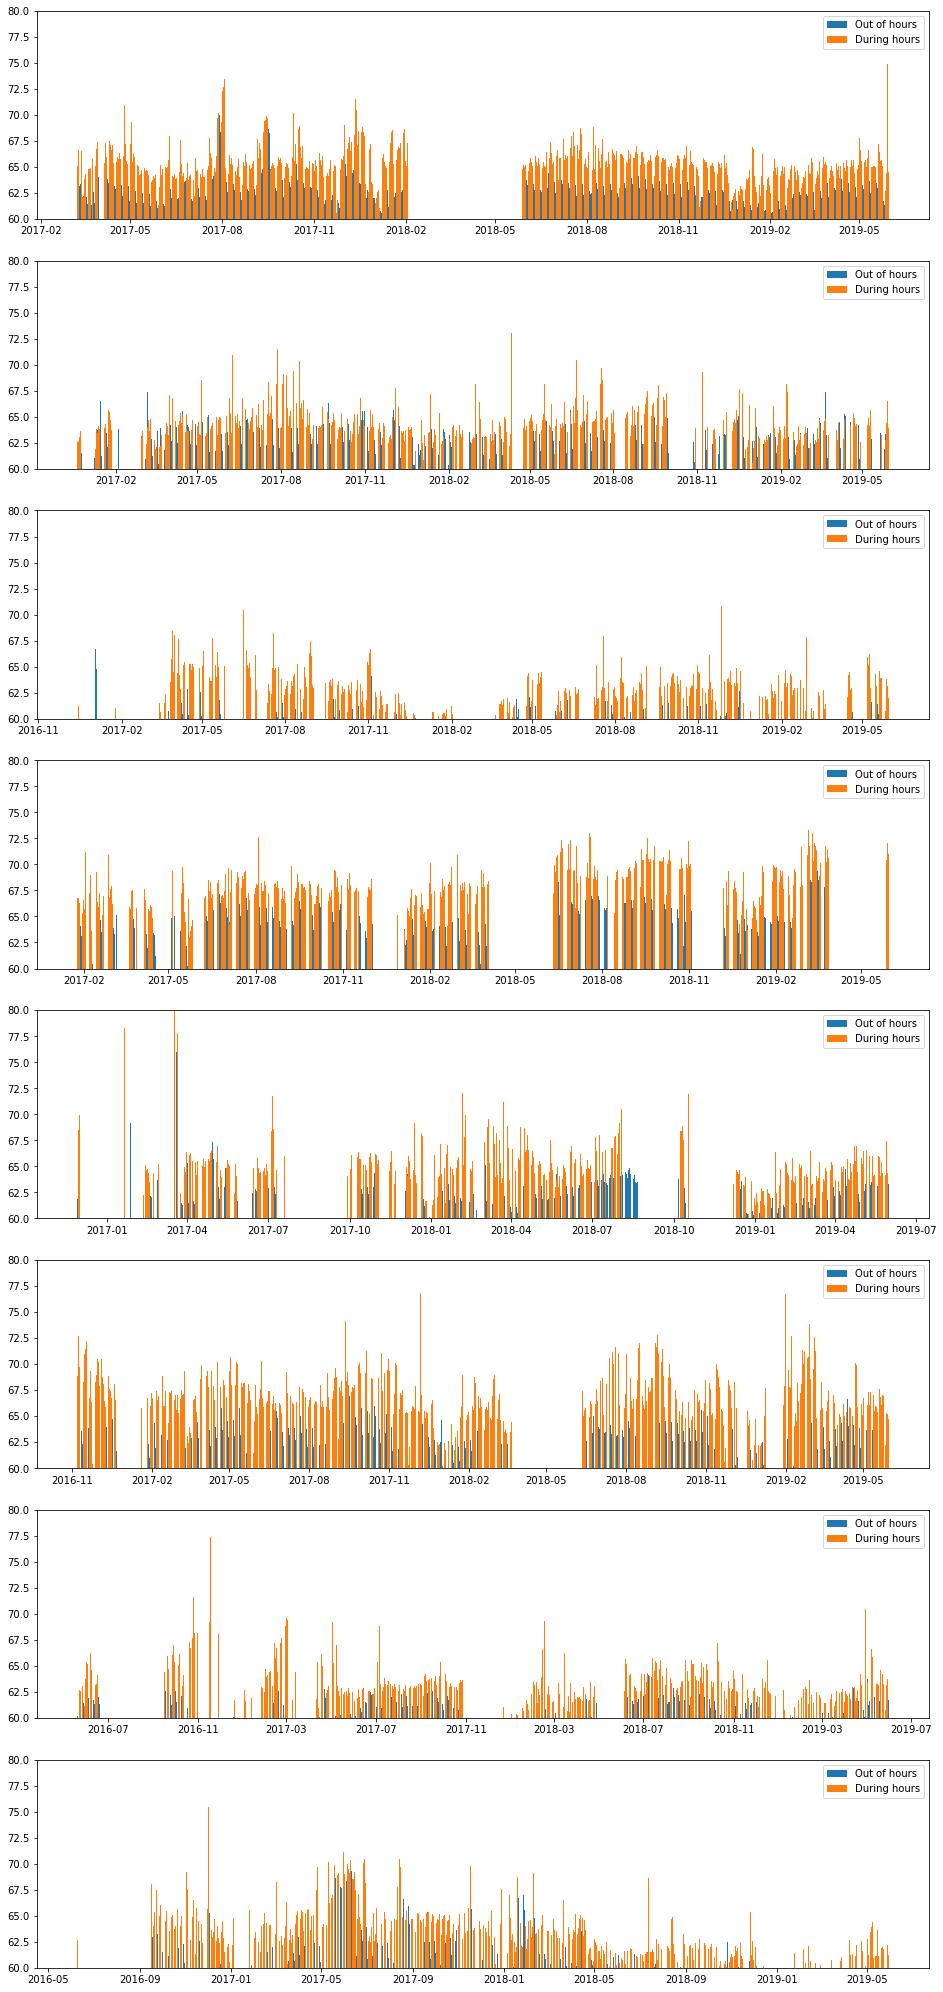

In [379]:
plt.tight_layout()
fig, axs = plt.subplots(len(sid_nodes_list),1, figsize=(16, 36))
j=0
for i in sid_nodes_list: 
    varname = '{}_df'.format(i)
    axs[j].bar(d_minute_out_of_hours[varname]\
            [d_minute_out_of_hours[varname].rolling_std<2].resample('1D').mean().dropna().index,\
            d_minute_out_of_hours[varname]\
            [d_minute_out_of_hours[varname].rolling_std<2].resample('1D').mean().dropna().rolling_mean)
    axs[j].bar(d_minute_during_hours[varname]\
            [d_minute_during_hours[varname].rolling_std<2].resample('1D').mean().dropna().index,\
            d_minute_during_hours[varname]\
            [d_minute_during_hours[varname].rolling_std<2].resample('1D').mean().dropna().rolling_mean)
    axs[j].legend(['Out of hours','During hours'])
    axs[j].set_ylim([60,80])
    j = j+1

This plot shows the dates where there are missing values for each sensor.

(60, 80)

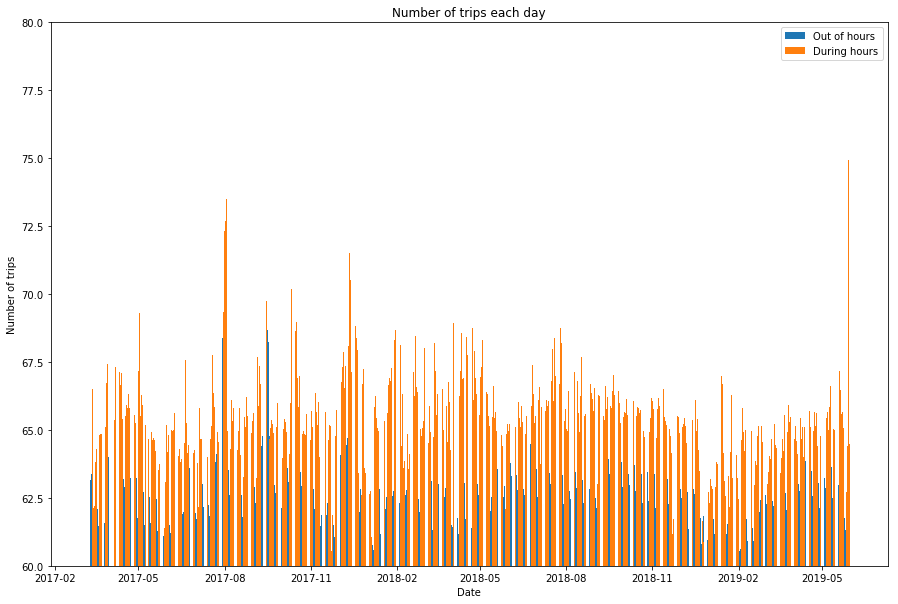

In [371]:
plt.figure(figsize=(15,10))
plt.title("Number of trips each day")
plt.xlabel('Date')
plt.ylabel('Number of trips')
plt.bar(d_minute_out_of_hours['sonycnode-b827ebb40450.sonyc_df']\
         [d_minute_out_of_hours['sonycnode-b827ebb40450.sonyc_df'].rolling_std<2].resample('1D').mean().dropna().index,\
         d_minute_out_of_hours['sonycnode-b827ebb40450.sonyc_df']\
[d_minute_out_of_hours['sonycnode-b827ebb40450.sonyc_df'].rolling_std<2].resample('1D').mean().dropna().rolling_mean)
plt.bar(d_minute_during_hours['sonycnode-b827ebb40450.sonyc_df']\
         [d_minute_during_hours['sonycnode-b827ebb40450.sonyc_df'].rolling_std<2].resample('1D').mean().dropna().index,\
         d_minute_during_hours['sonycnode-b827ebb40450.sonyc_df']\
         [d_minute_during_hours['sonycnode-b827ebb40450.sonyc_df'].rolling_std<2].resample('1D').mean().dropna().rolling_mean)
plt.legend(['Out of hours','During hours'])
plt.ylim([60,80])

# Movement of construction between sensors

In [197]:
order_list = []
for i in sid_nodes_list: 
    varname = '{}_df'.format(i)
    print(d_daily[varname].dropna().rolling_mean.argmax())
    order_list.append([d_daily[varname].dropna().rolling_mean.argmax(),i])

2017-08-02 00:00:00-04:00
2017-08-10 00:00:00-04:00
2017-04-11 00:00:00-04:00
2019-03-26 00:00:00-04:00
2017-03-17 00:00:00-04:00
2018-09-12 00:00:00-04:00
2016-11-07 00:00:00-05:00
2017-06-01 00:00:00-04:00


/usr/local/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: 'argmax' is deprecated. Use 'idxmax' instead. The behavior of 'argmax' will be corrected to return the positional maximum in the future. Use 'series.values.argmax' to get the position of the maximum now.
  after removing the cwd from sys.path.
/usr/local/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning: 'argmax' is deprecated. Use 'idxmax' instead. The behavior of 'argmax' will be corrected to return the positional maximum in the future. Use 'series.values.argmax' to get the position of the maximum now.
  """


In [198]:
reordered_list = pd.DataFrame(order_list,columns=['max_time','node_id']).sort_values('max_time')

Filter noise complaints to construction time 7am-3pm.
Resample minute and remove anomalies.

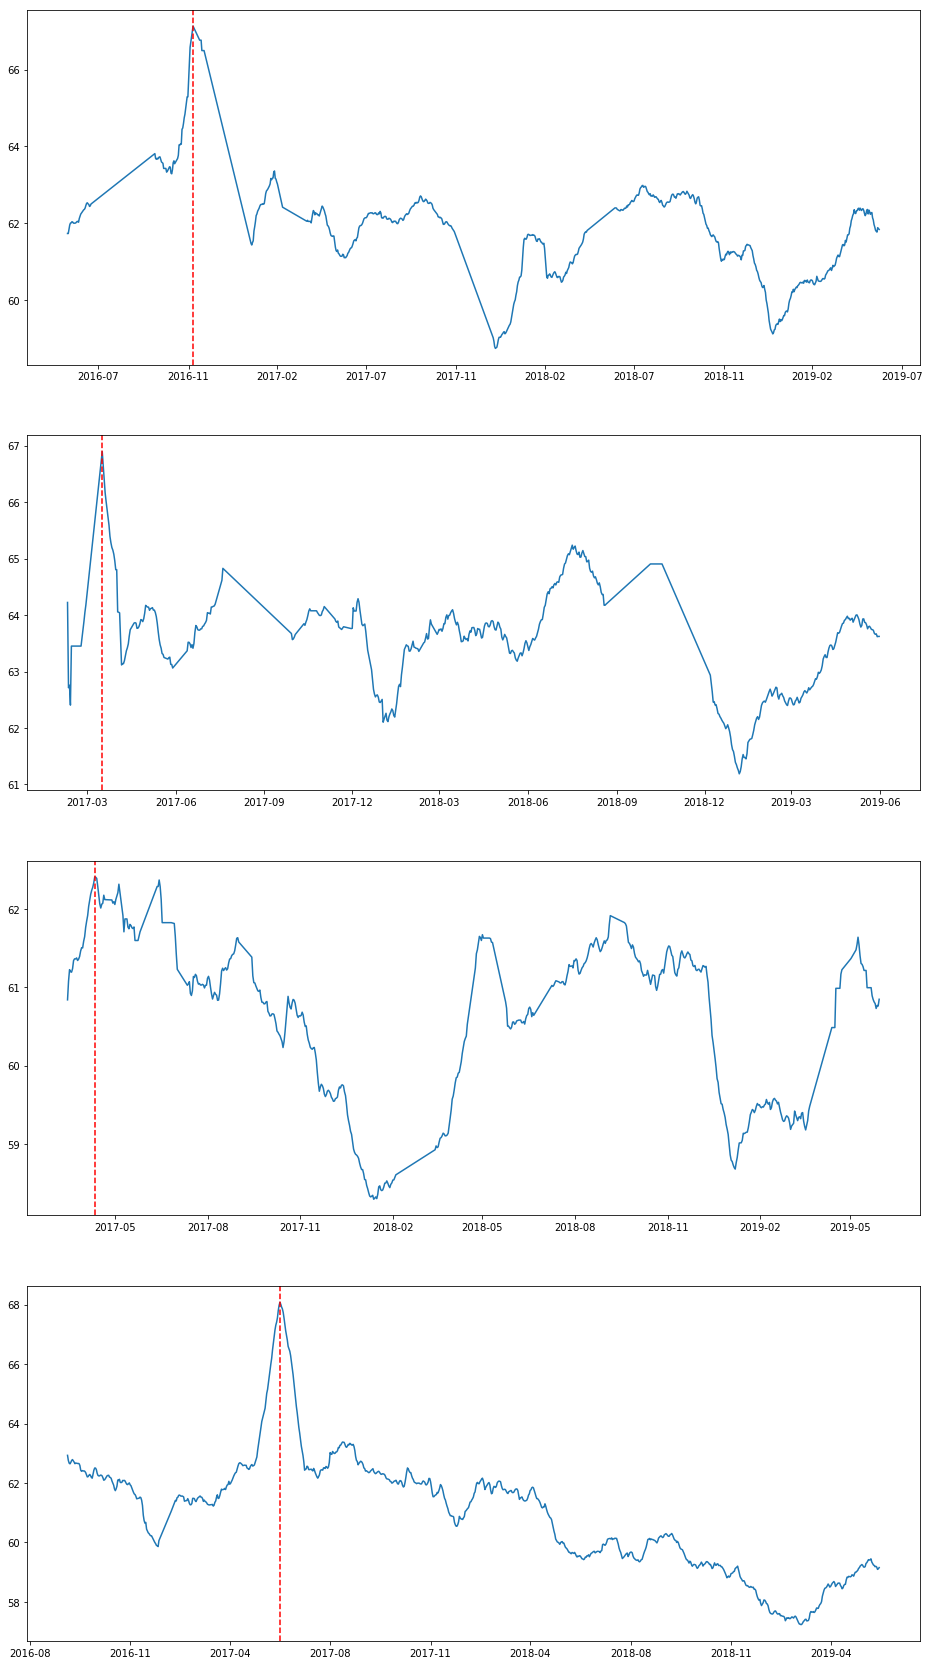

In [211]:
plt.tight_layout()
fig, axs = plt.subplots(len(reordered_list[0:4]), 1, figsize=(16, 30))
j=0
for i in list(reordered_list[0:4]['node_id']): 
    varname = '{}_df'.format(i)
    axs[j].plot(d_daily[varname].dropna().index,\
             d_daily[varname].dropna().rolling_mean)
    axs[j].axvline(x=reordered_list['max_time'][j],color='r', linestyle='--')
#     axs[j].plot(d_daily[varname].dropna().index,\
#              d_daily[varname].dropna().dBAS)
    j = j+1
fig.savefig('timeseries1.png')

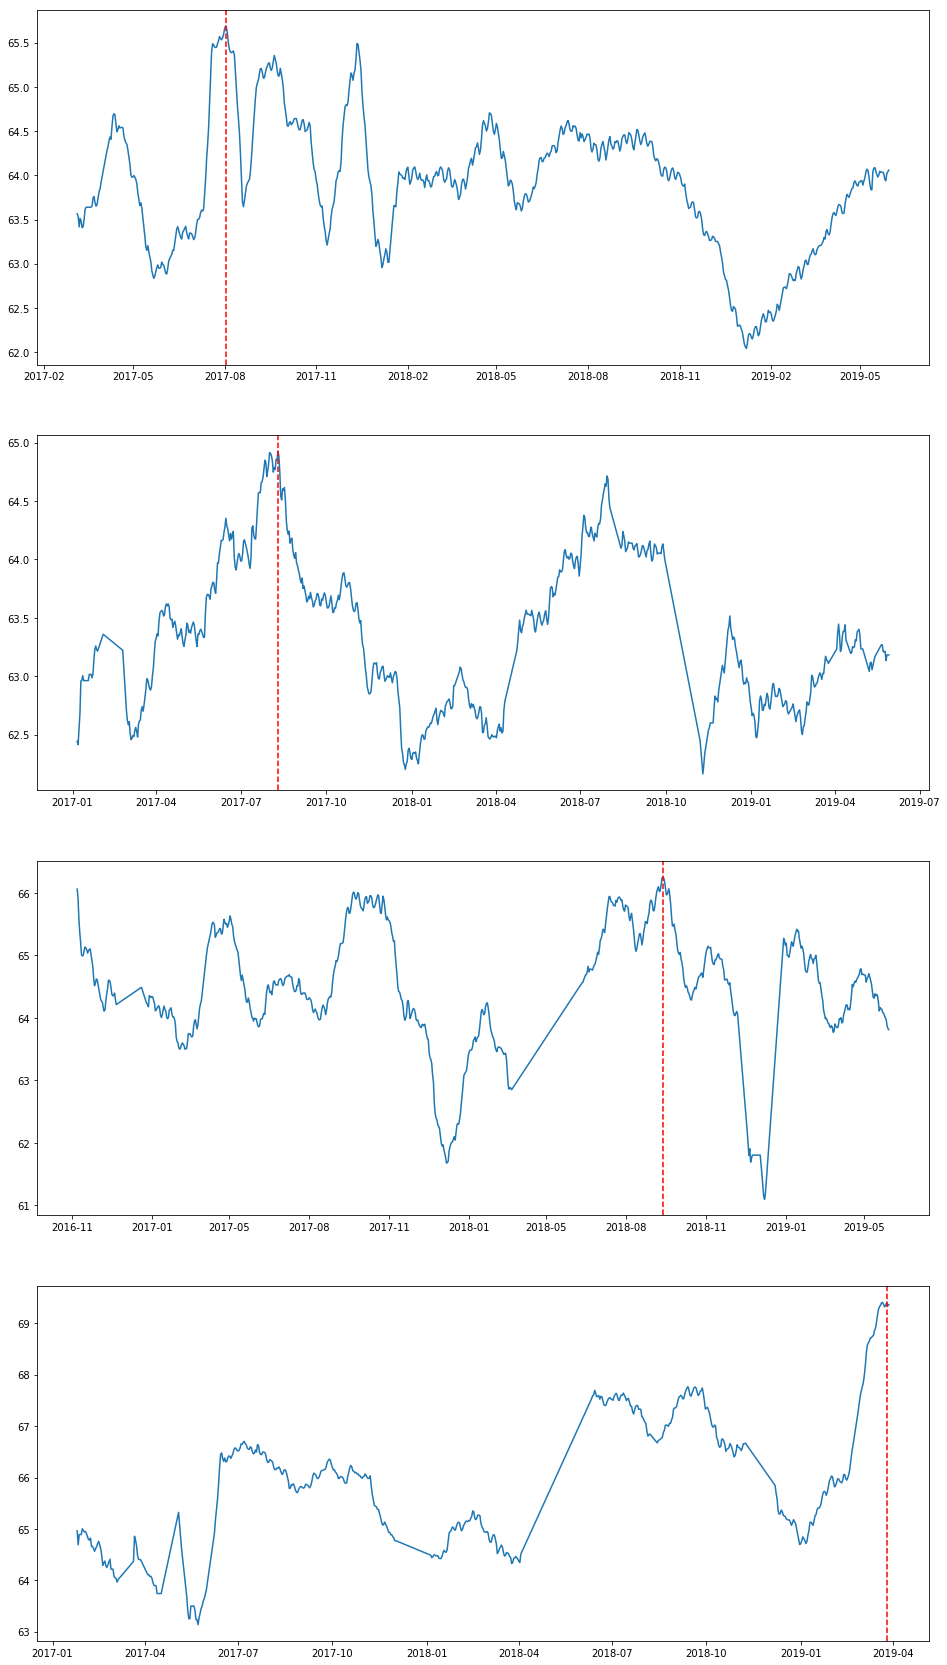

In [212]:
plt.tight_layout()
fig, axs = plt.subplots(len(reordered_list[4:8]), 1, figsize=(16, 30))
j=4
for i in list(reordered_list[4:8]['node_id']): 
    varname = '{}_df'.format(i)
    axs[j-4].plot(d_daily[varname].dropna().index,\
             d_daily[varname].dropna().rolling_mean)
    axs[j-4].axvline(x=reordered_list['max_time'][j],color='r', linestyle='--')
#     axs[j].plot(d_daily[varname].dropna().index,\
#              d_daily[varname].dropna().dBAS)
    j = j+1
fig.savefig('timeseries2.png')

The above plot shows the daily average noise levels of each sensor plotted by the maximum time and arranged. This could show the direction in which the construction was moving.

In [165]:
reordered_list

,max_time,node_id
6,2016-09-28 00:00:00-04:00,sonycnode-b827ebc6dcc6.sonyc
2,2017-04-06 00:00:00-04:00,sonycnode-b827eb905497.sonyc
7,2017-06-01 00:00:00-04:00,sonycnode-b827eb0fedda.sonyc
0,2017-07-27 00:00:00-04:00,sonycnode-b827ebb40450.sonyc
1,2017-07-28 00:00:00-04:00,sonycnode-b827eb9bed23.sonyc
4,2018-07-24 00:00:00-04:00,sonycnode-b827eb4cc22e.sonyc
5,2018-09-14 00:00:00-04:00,sonycnode-b827eb1685c7.sonyc
3,2019-03-17 00:00:00-04:00,sonycnode-b827eb7b2c3e.sonyc


# Getting ambient noise levels and looking for sustained noise

In [427]:
def calcbg(data, stat_value=90):
    stat_percentile = 100 - stat_value
    return np.nanpercentile(data, stat_percentile)

In [430]:
for i in sid_nodes_list: 
    varname = '{}_df'.format(i)
    print(varname)
'sonycnode-b827ebb40450.sonyc_df'].loc['2018-01-31 12:30:00-0500':'2018-01-31 13:00:00-0500']

sonycnode-b827ebb40450.sonyc_df
sonycnode-b827eb9bed23.sonyc_df
sonycnode-b827eb905497.sonyc_df
sonycnode-b827eb7b2c3e.sonyc_df
sonycnode-b827eb4cc22e.sonyc_df
sonycnode-b827eb1685c7.sonyc_df
sonycnode-b827ebc6dcc6.sonyc_df
sonycnode-b827eb0fedda.sonyc_df


In [450]:
60*60

3600

In [451]:
d_seconds['sonycnode-b827ebb40450.sonyc_df']['ambient_level'] = d_seconds['sonycnode-b827ebb40450.sonyc_df']\
['dBAS'].rolling(window=86400,center=True,min_periods=3600).apply(lambda x: calcbg(x))

In [449]:
d_seconds['sonycnode-b827ebb40450.sonyc_df'].dropna()

,dBAS,ambient_level
timestamp,,


In [ ]:
plt.figure(figsize=(15,10))
plt.title("Number of trips each day")
plt.xlabel('Date')
plt.ylabel('Number of trips')
plt.bar(d_minute_out_of_hours['sonycnode-b827ebb40450.sonyc_df']\
         [d_minute_out_of_hours['sonycnode-b827ebb40450.sonyc_df'].rolling_std<2].resample('1D').mean().dropna().index,\
         d_minute_out_of_hours['sonycnode-b827ebb40450.sonyc_df']\
[d_minute_out_of_hours['sonycnode-b827ebb40450.sonyc_df'].rolling_std<2].resample('1D').mean().dropna().rolling_mean)